<a href="https://colab.research.google.com/github/lalit-jamdagnee/Learning_ML/blob/main/Exercise_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Load the MNIST dataset and split it into a training set and a test set. Train a random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new Random Forest Classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [15]:
# Loadint the mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = mnist['data'], mnist['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, random_state=42)

In [18]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (60000, 784)
X_test.shape:  (10000, 784)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


In [19]:
# Train a random forest classifier on the dataset
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
t1 = time.time()

In [21]:
print("Time taken to train {:.2f}s".format(t1-t0))

Time taken to train 83.35s


In [22]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
model1_acc = accuracy_score(y_test, y_pred)
print("Model 1 accuracy: {:.2f}%".format(model1_acc*100))


Model 1 accuracy: 96.74%


In [23]:
# Now let use PCA before training the data

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [24]:
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
t3 = time.time()
rnd_clf2.fit(X_train_reduced, y_train)
t4 = time.time()

In [26]:
print("Time take to train is {:.2f}s".format(t4-t3))

Time take to train is 177.67s


In [27]:
y_pred2 = rnd_clf2.predict(X_test_reduced)
model2_acc = accuracy_score(y_test, y_pred2)
print("Model 2 accuracy: {:.2f}%".format(model2_acc*100))

Model 2 accuracy: 94.87%


After Performing the PCA for dimensionality Reduction the time taken by the model (Random Forest Classifier) has Increased significantly. The dimensionality reduction  does not always lead to faster training time, it depends on the dataset, the model and the training algorithm. If we try a softmax classifier instead of a random forest classifier, this training time will get reduced by a factor of 3 when using PCA.

And As it was expected for the performance to drop slightly when reducing the dimenionality, because we do lose some useful information in the process.

In [28]:
# Let's use softmax regression

from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(multi_class="multinomial", solver='lbfgs', random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print("Time take to train: {:.2f}s".format(t1-t0))

Time take to train: 55.97s


In [30]:
y_pred = log_clf.predict(X_test)
model3_acc = accuracy_score(y_test, y_pred)
print("Model 3 accuracy: {:.2f}%".format(model3_acc*100))

Model 3 accuracy: 91.89%


In [31]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver='lbfgs', random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print("Time taken to train: {:.2f}s".format(t1-t0))

Time taken to train: 16.19s


In [33]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)*100

91.41

Here we can clearly see the training time have decreased by 3 time after using PCA.

And a very slight drop in performance, which is reasonable for such a speedup.

So here we can see that PCA stands out to be useful in this case.

* Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the
 result using Matplotlib. You can use a scatterplot using 10 different colors to rep
resent each image’s target class. Alternatively, you can replace each dot in the
 scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even
 plot scaled-down versions of the digit images themselves (if you plot all digits,
 the visualization will be too cluttered, so you should either draw a random sam
ple or plot an instance only if no other instance has already been plotted at a
 close distance). You should get a nice visualization with well-separated clusters of
 digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or
 MDS and compare the resulting visualizations.

In [36]:
'''
Dimensionality Reduction on 60,000 images will take too much time so will
perform it on random subset of 10,000 images
'''
import numpy as np
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]

# Access data using row indices (idx) instead of column names
X = mnist['data'].iloc[idx]
y = mnist['target'].iloc[idx]

In [40]:
print(X.shape)

(10000, 784)


In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [41]:
print(X_reduced.shape)

(10000, 2)


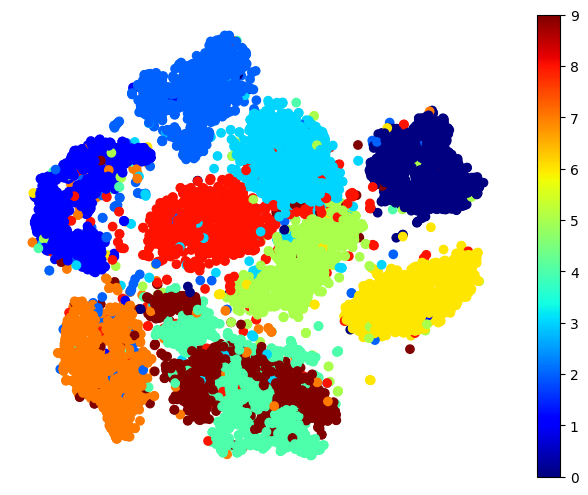

In [42]:
# Let's use Matplotlib to plot scatter plot
import matplotlib.pyplot as plt

y_numeric = y.astype(int)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Isn't this just beautiful? :) This plot tells us which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it also tells us which numbers are often hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).

In [43]:
# let's draw the plot for the PCA

pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X)

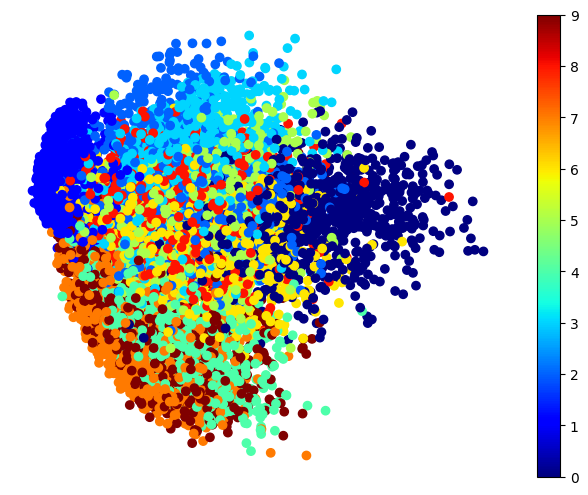

In [44]:
y_numeric = y.astype(int)
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

PCA is very fast, but we do see a few clusters, there's way too much overlap.
Let's try LLE

In [49]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, random_state=42)
t0 = time.time()
X_reduced = lle.fit_transform(X)
t1 = time.time()
print("Time taken to perform LLE: {:.2f}s".format(t1-t0))

Time taken to perform LLE: 21.67s


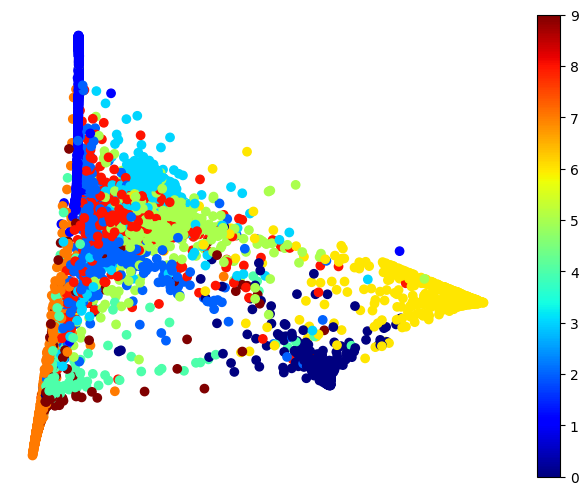

In [50]:

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Let's see what happen when we apply PCA first then LLE

In [51]:
from sklearn.pipeline import Pipeline

lle = LocallyLinearEmbedding(n_components = 2, random_state=42)
pca = PCA(n_components=0.95, random_state=42)
pipe = Pipeline([("pca", pca), ("lle", lle)])

t0 = time.time()
X_reduced = pipe.fit_transform(X)
t1 = time.time()
print("Time taken to perform LLE: {:.2f}s".format(t1-t0))

Time taken to perform LLE: 19.81s


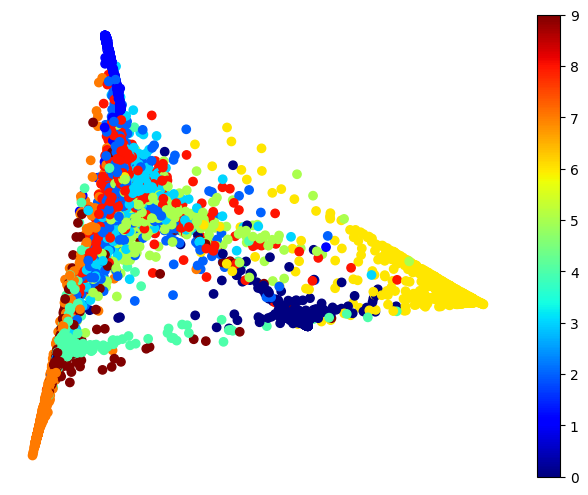

In [52]:

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

The result is almost same but this time it was much faster

Let's try MDS. It's much too long if we run 10,000 instances, so let's try 2000 instances

In [53]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
t0 = time.time()
X_reduced = mds.fit_transform(X[:2000])
t1 = time.time()
print("Time taken by MDS: {:.2f}s".format(t1-t0))

Time taken by MDS: 190.59s


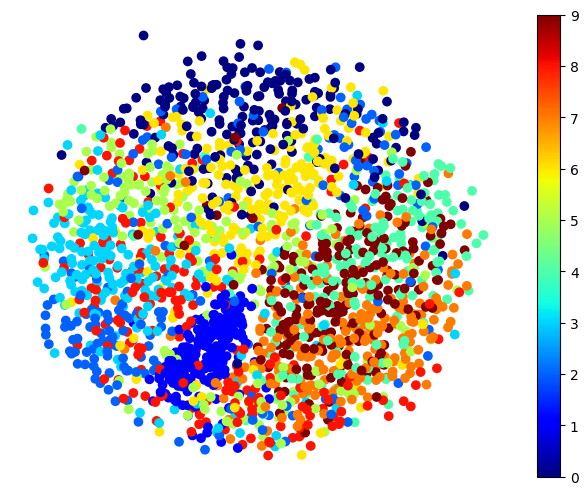

In [55]:

plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric[:2000], cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Let's try LDA:

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
t0 = time.time()
X_reduced = lda.fit_transform(X, y)
t1 = time.time()
print("Time taken by LDA: {:.2f}s".format(t1-t0))

Time taken by LDA: 5.06s


In [57]:
def plot(X_reduced):
  plt.figure(figsize=(8,6))
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap="jet")
  plt.axis('off')
  plt.colorbar()
  plt.show()

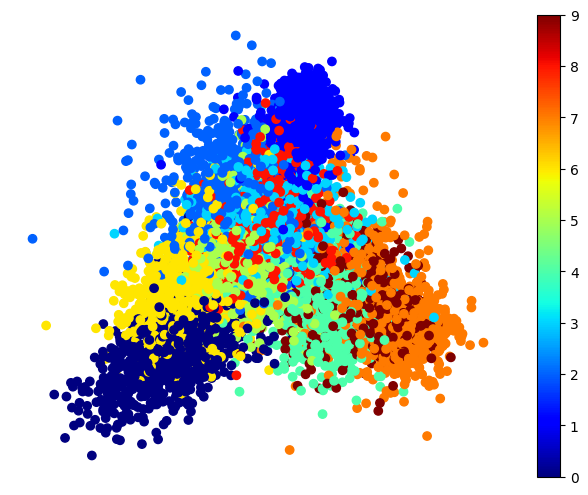

In [58]:
plot(X_reduced)

LDA was tremendously fast, but several cluster overlaps here too.

So by far t-SNE won this competition. Let's time it

In [59]:
tsnd = TSNE(n_components=2, random_state=42)
t0 = time.time()
X_reduced = tsnd.fit_transform(X)
t1 = time.time()
print("Time taken by t-SNE: {:.2f}s".format(t1-t0))

Time taken by t-SNE: 192.43s


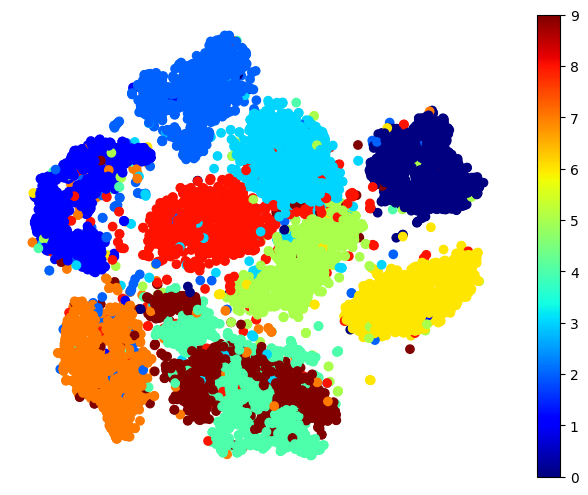

In [60]:
plot(X_reduced)

Let's try see if a bit pca can speed it up

In [61]:
pca = PCA(n_components=0.95, random_state=42)
tsne = TSNE(n_components=2, random_state=42)
pipe = Pipeline([("pca", pca),("tsne",tsne)])

t0 = time.time()
X_reduced = pipe.fit_transform(X)
t1 = time.time()
print("Time taken by t-SNE: {:.2f}s".format(t1-t0))

Time taken by t-SNE: 139.16s


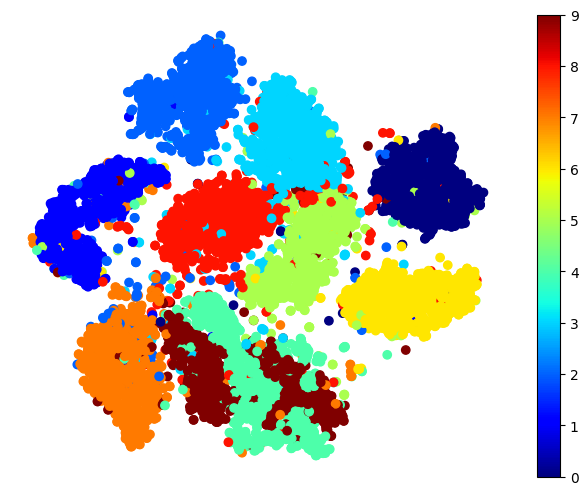

In [62]:
plot(X_reduced)

So we can say that PCA roughly gave us a significant speedup without damaging the result.